# dir_folder - 
##### директория такого вида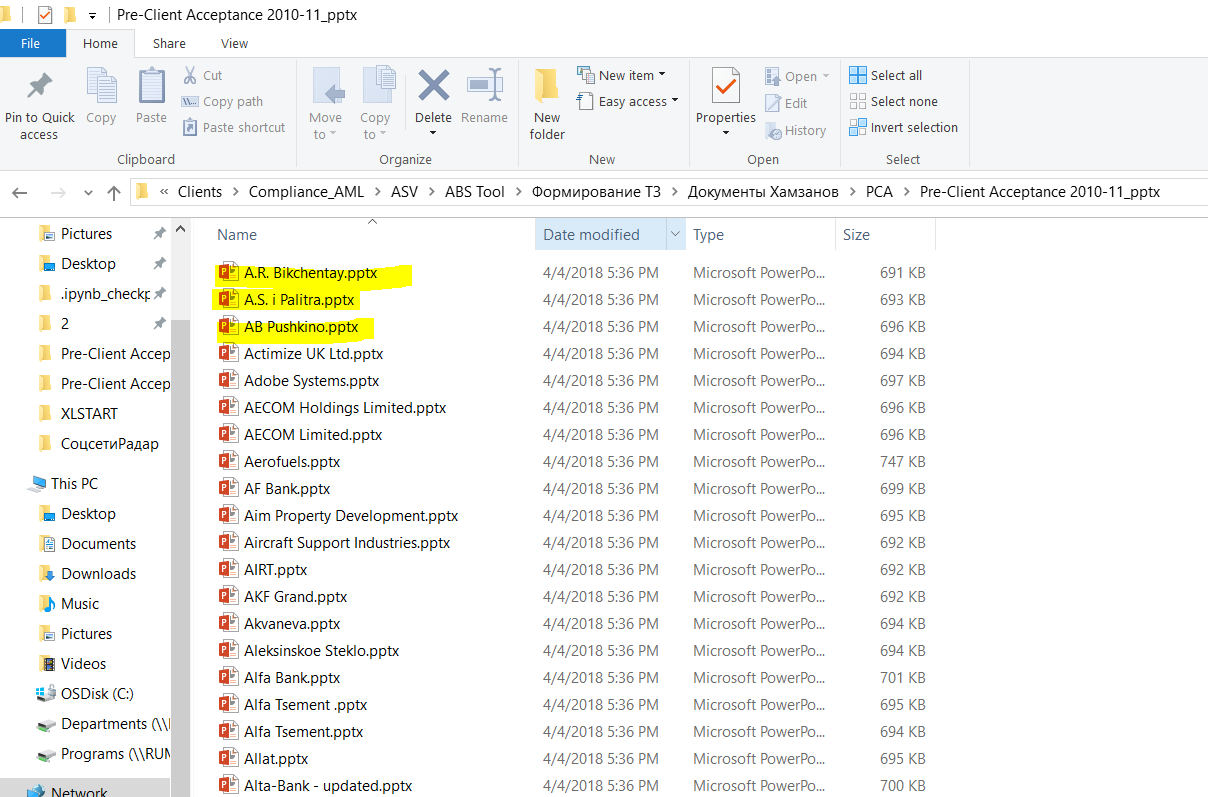.
##### из нее нужно получить все презентации содержащиеся в данной директории
##### далее все презентации нужно скопировать в такую же папку с префиксом _pptx для удобвства.
# dir_pptx - директория с скопированными их дирректории презентациями
##### 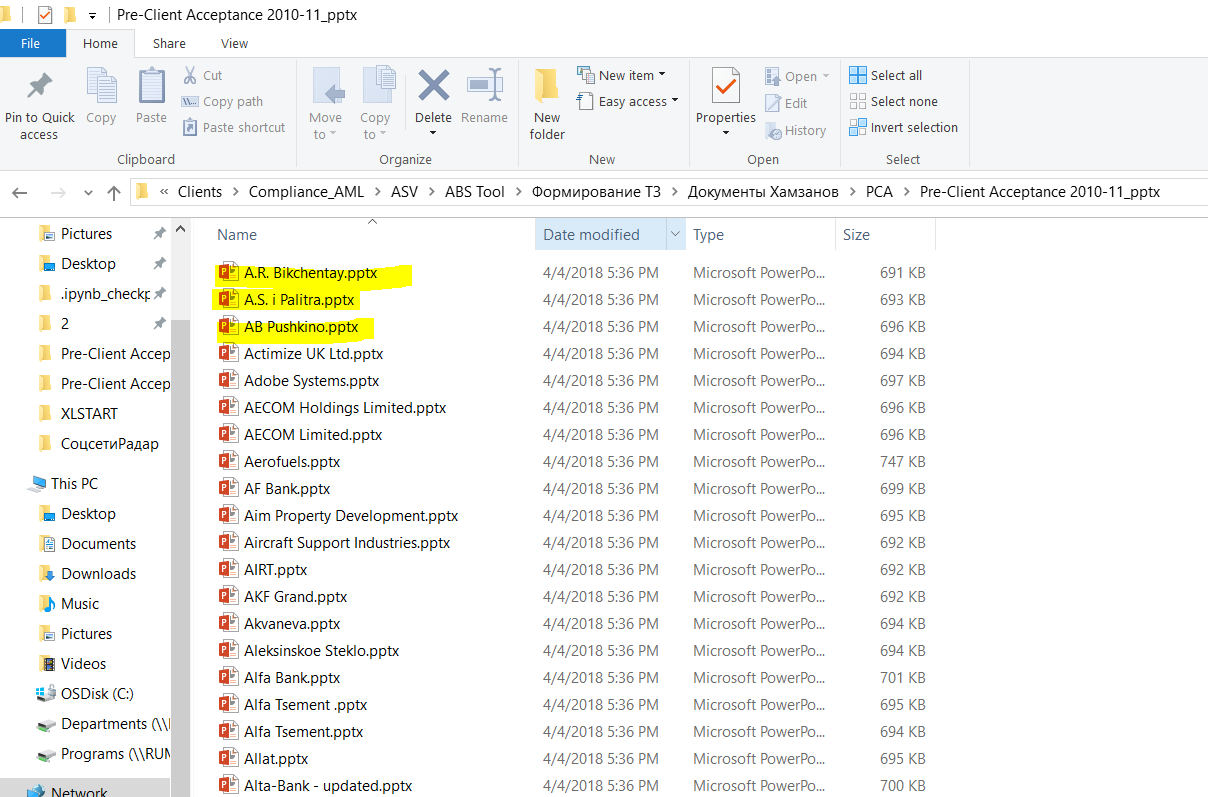

# Ввод директорий

In [204]:
import glob
import shutil
from pptx import Presentation
import os
import pandas as pd
#os.chdir('..')
dir_folder = r"C:\Users\mkhamzanov\Desktop\PCA\Pre-Client Acceptance 2017-18"
dir_pptx = r'C:\Users\mkhamzanov\Desktop\PCA\Pre-Client Acceptance 2017-18_pptx'
os.chdir(dir_folder)
os.getcwd()

'C:\\Users\\mkhamzanov\\Desktop\\PCA\\Pre-Client Acceptance 2017-18'

# Создаю датафрейм в который с помощью цикла буду апендить пропарсенную презентацию, по одной

In [205]:
general_columns = ['Company name', 'Key', 'Date', 'Registration details',
       'Key individuals', 'Background', 'Notes',
       'affiliationtocriminalorcontroversialindividuals',
       'allegationsofbribery',
       'allegationsofmoneylaundering/blackcash',
       'regulatoryenquiries/criminalconvictions',
       'internationalblacklistsearchresult',
       'partytocourtarbitrationorlitigations',
       'disputeswithauthorities',
       'affiliationtopoliticallyexposedpersons',
       'stateinvolvementasshareholder', 'listedonstockexchanges',
       'opaqueshareholdingstructure', 'corporateaffairs',
       'businessrelations', 'otherissues']
general = pd.DataFrame(columns=general_columns)
df_sources_g = pd.DataFrame(columns=['Sources','CompanyName'])
df_sources_g

,Sources,CompanyName


# Получаю список папок из dir_folder 

In [206]:
os.walk(dir_folder)
list_of_folders = next(os.walk('.'))[1]
#list_of_folders

# Ищу в директории презентации и копирую их в dir_pptx

In [200]:
i = 0
for folder in list_of_folders:
    i = i+1
    src_dir = str(dir_folder) +'\\'+ str(folder)
    for pptx in glob.iglob(os.path.join(src_dir, "*.pptx")):
        shutil.copy(pptx, dir_pptx)
    #print(100*i/len(list_of_folders),'% - completed')

In [201]:
os.getcwd()

'C:\\Users\\mkhamzanov\\Desktop\\PCA\\Pre-Client Acceptance 2017-18'

# Получаю список файлов в dir_pptx, (удалите невалидные презентации, невалидные это те , что пустые и весят 1 Кб, на них цикл валится)

# Неликвидные выглядят так:
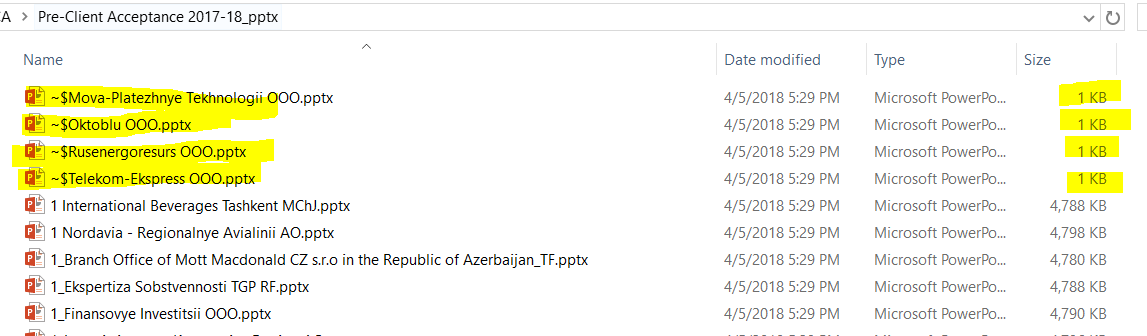

In [209]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(dir_pptx) if isfile(join(dir_pptx, f))]
os.getcwd()
len(onlyfiles)

472

# Здесь основное тело программы, все что и в draft, но выполняется в цикле для каждой презентации. Все пункты указаны / помечены #.

In [210]:
os.chdir(dir_pptx)
j=0
for name in onlyfiles:
    prs = Presentation(name)
    #print(name)
    j=j+1
    #print(#name,100*j/len(onlyfiles),'% process')
    
    
    # TRG - Getting name of company
    i=0
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
    
            if i==2:
                name_of_company = title
            else:
                i=i
    except:
        pass
    
    if name_of_company[:10] == 'A Limited ':
        name_of_company = name_of_company[48:]
    if name_of_company[:5] == 'Отчет':
        name_of_company = name_of_company[45:]
    else:
        name_of_company = name_of_company[40:]
    d = {'Company name': name_of_company, 'Key': '1'}
    trg = pd.DataFrame([d], columns=d.keys())
    
    #dt
    i=0
    try:
        for slide in prs.slides:
            i=i+1
            if i==1:
                slide_date = slide
            else:
                i=i
    except:
        pass
    
    i = 0
    for shape in slide_date.shapes:
        i = i+1
        if i==2:
            dt_text = shape.text
    dt_text = dt_text.replace(trg['Company name'].values[0], '')
    dt_text = dt_text.replace('\n','')
    dt_text
    
    d = {'Date': dt_text, 'Key': '1'}
    dt = pd.DataFrame([d], columns=d.keys())
    # Corporate details
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
            if (title=='Corporate details'):
                slide_x = slide
            else:
                i=i
    except:
        pass
    d={}
    i=0
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(1,0).text_frame.text})
            else:
                i = i
    except:
        pass
    df_c_d = pd.DataFrame([d], columns=d.keys())
    # Corporate details (1/2)
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
            if (title=='Corporate details (1/2)'):
                slide_x = slide
            else:
                i=i
    except:
        pass
    d={}
    i=0
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(1,0).text_frame.text})
            else:
                i = i
    except:
        pass
    df_c_d_1_2 = pd.DataFrame([d], columns=d.keys())
    # Corporate details (1/1)
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
            if (title=='Corporate details (1/1)'):
                slide_x = slide
            else:
                i=i
    except:
        pass
    d={}
    i=0
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(1,0).text_frame.text})
            else:
                i = i
    except:
        pass
    df_c_d_1_1 = pd.DataFrame([d], columns=d.keys())    
    # Check empty df
    df_keys = pd.DataFrame(columns=['Key'])
    df_keys.loc[0] = '1'
    # Create function
    def empty_df(df):
        if df.empty is True:
            df = df_keys
        else:
            df = df
        return df
    # Using created function
    df_c_d_1_1 = empty_df(df_c_d_1_1)
    df_c_d_1_2 = empty_df(df_c_d_1_2)
    df_c_d = empty_df(df_c_d)
    # Merging
    df_c_d_g = df_c_d_1_1.merge(df_c_d_1_2.merge(df_c_d))
    # Check columns
    def column(df):
        i=1
        if 'Registration details' not in df.columns:
            df['Registration details'] = 'No_data'
        if 'Key individuals' not in df.columns:
            df['Key individuals'] = 'No_data'
        if 'Background' not in df.columns:
            df['Background'] = 'No_data'
        if 'Notes' not in df.columns:
            df['Notes'] = 'No_data'
        else:
            i = i
        return df[['Registration details','Key individuals','Background','Notes','Key']]
    
    df_c_d_g = column(df_c_d_g)
    # Key findings
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
    
            if (title=='Key findings'):
                slide_x = slide
            else:
                i=i
            
    except:
        pass
    d={}
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(0,1).text_frame.text})
                d.update({shape.table.cell(1,0).text_frame.text : shape.table.cell(1,1).text_frame.text})
                d.update({shape.table.cell(2,0).text_frame.text : shape.table.cell(2,1).text_frame.text})
                d.update({shape.table.cell(3,0).text_frame.text : shape.table.cell(3,1).text_frame.text})
                d.update({shape.table.cell(4,0).text_frame.text : shape.table.cell(4,1).text_frame.text})
                d.update({shape.table.cell(5,0).text_frame.text : shape.table.cell(5,1).text_frame.text})
                d.update({shape.table.cell(6,0).text_frame.text : shape.table.cell(6,1).text_frame.text})
                d.update({shape.table.cell(7,0).text_frame.text : shape.table.cell(7,1).text_frame.text})
                d.update({shape.table.cell(8,0).text_frame.text : shape.table.cell(8,1).text_frame.text})
                d.update({shape.table.cell(9,0).text_frame.text : shape.table.cell(9,1).text_frame.text})
                d.update({shape.table.cell(10,0).text_frame.text : shape.table.cell(10,1).text_frame.text})
                d.update({shape.table.cell(11,0).text_frame.text : shape.table.cell(11,1).text_frame.text})
                d.update({shape.table.cell(12,0).text_frame.text : shape.table.cell(12,1).text_frame.text})
                d.update({shape.table.cell(13,0).text_frame.text : shape.table.cell(13,1).text_frame.text})
            else:
                i=i
    except:
        pass
    df_k_f = pd.DataFrame([d], columns=d.keys())
    # Executive summary
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
    
            if (title=='Executive summary'):
                slide_x = slide
            else:
                i=i
            
    except:
        pass
    d={}
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(0,1).text_frame.text})
                d.update({shape.table.cell(1,0).text_frame.text : shape.table.cell(1,1).text_frame.text})
                d.update({shape.table.cell(2,0).text_frame.text : shape.table.cell(2,1).text_frame.text})
                d.update({shape.table.cell(3,0).text_frame.text : shape.table.cell(3,1).text_frame.text})
                d.update({shape.table.cell(4,0).text_frame.text : shape.table.cell(4,1).text_frame.text})
                d.update({shape.table.cell(5,0).text_frame.text : shape.table.cell(5,1).text_frame.text})
                d.update({shape.table.cell(6,0).text_frame.text : shape.table.cell(6,1).text_frame.text})
                d.update({shape.table.cell(7,0).text_frame.text : shape.table.cell(7,1).text_frame.text})
                d.update({shape.table.cell(8,0).text_frame.text : shape.table.cell(8,1).text_frame.text})
                d.update({shape.table.cell(9,0).text_frame.text : shape.table.cell(9,1).text_frame.text})
                d.update({shape.table.cell(10,0).text_frame.text : shape.table.cell(10,1).text_frame.text})
                d.update({shape.table.cell(11,0).text_frame.text : shape.table.cell(11,1).text_frame.text})
                d.update({shape.table.cell(12,0).text_frame.text : shape.table.cell(12,1).text_frame.text})
                d.update({shape.table.cell(13,0).text_frame.text : shape.table.cell(13,1).text_frame.text})
            else:
                i=i
    except:
        pass
    df_e_s = pd.DataFrame([d], columns=d.keys())
    # Executive summary Key findings (1/2)
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
    
            if (title=='Executive summary\nKey findings (1/2)'):
                slide_x = slide
            else:
                i=i
            
    except:
        pass
    d={}
    try:
        for slide in slide_array:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(0,1).text_frame.text})
                d.update({shape.table.cell(1,0).text_frame.text : shape.table.cell(1,1).text_frame.text})
                d.update({shape.table.cell(2,0).text_frame.text : shape.table.cell(2,1).text_frame.text})
                d.update({shape.table.cell(3,0).text_frame.text : shape.table.cell(3,1).text_frame.text})
                d.update({shape.table.cell(4,0).text_frame.text : shape.table.cell(4,1).text_frame.text})
                d.update({shape.table.cell(5,0).text_frame.text : shape.table.cell(5,1).text_frame.text})
                d.update({shape.table.cell(6,0).text_frame.text : shape.table.cell(6,1).text_frame.text})
                d.update({shape.table.cell(7,0).text_frame.text : shape.table.cell(7,1).text_frame.text})
                d.update({shape.table.cell(8,0).text_frame.text : shape.table.cell(8,1).text_frame.text})
                d.update({shape.table.cell(9,0).text_frame.text : shape.table.cell(9,1).text_frame.text})
                d.update({shape.table.cell(10,0).text_frame.text : shape.table.cell(10,1).text_frame.text})
                d.update({shape.table.cell(11,0).text_frame.text : shape.table.cell(11,1).text_frame.text})
                d.update({shape.table.cell(12,0).text_frame.text : shape.table.cell(12,1).text_frame.text})
                d.update({shape.table.cell(13,0).text_frame.text : shape.table.cell(13,1).text_frame.text})
            else:
                i=i
    except:
        pass
    df_e_s_k_f_1_2 = pd.DataFrame([d], columns=d.keys())
    # Executive summary Key findings (2/2)
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
    
            if (title=='Executive summary\nKey findings (2/2)'):
                slide_x = slide
            else:
                i=i
            
    except:
        pass
    d={}
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(0,1).text_frame.text})
                d.update({shape.table.cell(1,0).text_frame.text : shape.table.cell(1,1).text_frame.text})
                d.update({shape.table.cell(2,0).text_frame.text : shape.table.cell(2,1).text_frame.text})
                d.update({shape.table.cell(3,0).text_frame.text : shape.table.cell(3,1).text_frame.text})
                d.update({shape.table.cell(4,0).text_frame.text : shape.table.cell(4,1).text_frame.text})
                d.update({shape.table.cell(5,0).text_frame.text : shape.table.cell(5,1).text_frame.text})
                d.update({shape.table.cell(6,0).text_frame.text : shape.table.cell(6,1).text_frame.text})
                d.update({shape.table.cell(7,0).text_frame.text : shape.table.cell(7,1).text_frame.text})
                d.update({shape.table.cell(8,0).text_frame.text : shape.table.cell(8,1).text_frame.text})
                d.update({shape.table.cell(9,0).text_frame.text : shape.table.cell(9,1).text_frame.text})
                d.update({shape.table.cell(10,0).text_frame.text : shape.table.cell(10,1).text_frame.text})
                d.update({shape.table.cell(11,0).text_frame.text : shape.table.cell(11,1).text_frame.text})
                d.update({shape.table.cell(12,0).text_frame.text : shape.table.cell(12,1).text_frame.text})
                d.update({shape.table.cell(13,0).text_frame.text : shape.table.cell(13,1).text_frame.text})
            else:
                i=i
    except:
        pass
    df_e_s_k_f_2_2 = pd.DataFrame([d], columns=d.keys())
    
    # Executive summary\nKey findings
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            i=i+1
            title = slide.shapes.title.text
    
            if (title=='Executive summary\nKey findings'):
                slide_x = slide
            else:
                i=i
            
    except:
        pass
    d={}
    try:
        for shape in slide_x.shapes:
            if shape.has_table:
                d.update({'Key' : '1'})
                d.update({shape.table.cell(0,0).text_frame.text : shape.table.cell(0,1).text_frame.text})
                d.update({shape.table.cell(1,0).text_frame.text : shape.table.cell(1,1).text_frame.text})
                d.update({shape.table.cell(2,0).text_frame.text : shape.table.cell(2,1).text_frame.text})
                d.update({shape.table.cell(3,0).text_frame.text : shape.table.cell(3,1).text_frame.text})
                d.update({shape.table.cell(4,0).text_frame.text : shape.table.cell(4,1).text_frame.text})
                d.update({shape.table.cell(5,0).text_frame.text : shape.table.cell(5,1).text_frame.text})
                d.update({shape.table.cell(6,0).text_frame.text : shape.table.cell(6,1).text_frame.text})
                d.update({shape.table.cell(7,0).text_frame.text : shape.table.cell(7,1).text_frame.text})
                d.update({shape.table.cell(8,0).text_frame.text : shape.table.cell(8,1).text_frame.text})
                d.update({shape.table.cell(9,0).text_frame.text : shape.table.cell(9,1).text_frame.text})
                d.update({shape.table.cell(10,0).text_frame.text : shape.table.cell(10,1).text_frame.text})
                d.update({shape.table.cell(11,0).text_frame.text : shape.table.cell(11,1).text_frame.text})
                d.update({shape.table.cell(12,0).text_frame.text : shape.table.cell(12,1).text_frame.text})
                d.update({shape.table.cell(13,0).text_frame.text : shape.table.cell(13,1).text_frame.text})
            else:
                i=i
    except:
        pass
    df_e_s_n_k_f = pd.DataFrame([d], columns=d.keys())    
    
    
    # Using empty_df
    df_e_s = empty_df(df_e_s)
    df_k_f = empty_df(df_k_f)
    df_e_s_k_f_1_2 = empty_df(df_e_s_k_f_1_2)
    df_e_s_k_f_2_2 = empty_df(df_e_s_k_f_2_2)
    df_e_s_n_k_f = empty_df(df_e_s_n_k_f)
    df_e_s_k_f_g = df_e_s.merge(df_e_s_k_f_1_2.merge(df_e_s_k_f_2_2.merge(df_k_f.merge(df_e_s_n_k_f))))
    

    # Columns editing
    #\n
    df_e_s_k_f_g.columns = pd.Index(map(lambda x : str(x).replace('\n',''), df_e_s_k_f_g.columns))
    #' '
    df_e_s_k_f_g.columns = pd.Index(map(lambda x : str(x).replace(' ',''), df_e_s_k_f_g.columns))
    # lower
    df_e_s_k_f_g.columns = pd.Index(map(lambda x : str(x).lower(), df_e_s_k_f_g.columns))
    #Affiliationwithcriminalorcontroversialindividuals
    df_e_s_k_f_g.columns = pd.Index(map(lambda x : str(x).replace('affiliationwithcriminalorcontroversialindividuals','affiliationtocriminalorcontroversialindividuals'),df_e_s_k_f_g.columns))
    #Affiliationwithcriminalorcontroversialindividuals
    df_e_s_k_f_g.columns = pd.Index(map(lambda x : str(x).replace('affiliationwithpoliticallyexposedpersons','affiliationtopoliticallyexposedpersons'),df_e_s_k_f_g.columns))
    # Check columns
    def column_e_s(df):
        
        i=1
        
        if 'affiliationtocriminalorcontroversialindividuals' not in df.columns:
            df['affiliationtocriminalorcontroversialindividuals'] = 'No_data'
            
        if ('allegationsofbribery' not in df.columns):
            df['allegationsofbribery'] = 'No_data'
            
        if 'allegationsofmoneylaundering/blackcash' not in df.columns:
            df['allegationsofmoneylaundering/blackcash'] = 'No_data'
            
        if 'regulatoryenquiries/criminalconvictions' not in df.columns:
            df['regulatoryenquiries/criminalconvictions'] = 'No_data'
            
        if 'internationalblacklistsearchresult' not in df.columns:
            df['internationalblacklistsearchresult'] = 'No_data'
            
        if 'partytocourtarbitrationorlitigations' not in df.columns:
            df['partytocourtarbitrationorlitigations'] = 'No_data'
            
        if 'disputeswithauthorities' not in df.columns:
            df['disputeswithauthorities'] = 'No_data'
            
        if 'affiliationtopoliticallyexposedpersons' not in df.columns:
            df['affiliationtopoliticallyexposedpersons'] = 'No_data'
            
        if 'stateinvolvementasshareholder' not in df.columns:
            df['stateinvolvementasshareholder'] = 'No_data'
            
        if 'listedonstockexchanges' not in df.columns:
            df['listedonstockexchanges'] = 'No_data'
            
        if 'opaqueshareholdingstructure' not in df.columns:
            df['opaqueshareholdingstructure'] = 'No_data'
            
        if 'corporateaffairs' not in df.columns:
            df['corporateaffairs'] = 'No_data'
            
        if 'businessrelations' not in df.columns:
            df['businessrelations'] = 'No_data'
    
        if 'otherissues' not in df.columns:
            df['otherissues'] = 'No_data'
            
        else:
            i = i
        return df[['key', 
                   'affiliationtocriminalorcontroversialindividuals',
                   'allegationsofbribery',
                   'allegationsofmoneylaundering/blackcash',
                   'regulatoryenquiries/criminalconvictions',
                   'internationalblacklistsearchresult',
                   'partytocourtarbitrationorlitigations',
                   'disputeswithauthorities',
                   'affiliationtopoliticallyexposedpersons',
                   'stateinvolvementasshareholder',
                   'listedonstockexchanges',
                   'opaqueshareholdingstructure',
                   'corporateaffairs',
                   'businessrelations', 
                   'otherissues']]
    

    # Using column_e_s
    df_e_s_k_f_g = column_e_s(df_e_s_k_f_g)
    
    # Key
    df_e_s_k_f_g.columns = pd.Index(map(lambda x : str(x).replace('key','Key'),df_e_s_k_f_g.columns))
    
    
    general_tmp = trg.merge(dt.merge(df_c_d_g.merge(df_e_s_k_f_g)))
    general = general.append(general_tmp)
    
    # Sources
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            
            i=i+1
            title = slide.shapes.title.text
            if (title=='Sources'):
                slide_x = slide
            else:
                i=i
    except:
        pass
    
    i = 0
    try:
        for shape in slide_x.shapes:
            i = i+1
            if i==2:
                sources = shape.text
        df_sources = pd.DataFrame({'Sources': sources.split('\n')})
        df_sources['Company Name'] = name_of_company
    except:
        pass
    
    # Ensure variable is defined
    try:
        df_sources
    except NameError:
        df_sources = None
    
    # Test whether variable is defined to be None
    if df_sources is None:
        #print('Empty')
        df_sources = pd.DataFrame(columns=['Sources','Company Name'])
        df_sources['Company Name'] = name_of_company
    else:
        #print('No_Empty')
        df_sources = df_sources
    # Sources (1/2)
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            
            i=i+1
            title = slide.shapes.title.text
            if (title=='Sources (1/2)'):
                slide_x = slide
            else:
                i=i
    except:
        pass
    
    i = 0
    try:
        for shape in slide_x.shapes:
            i = i+1
            if i==2:
                sources = shape.text
        df_sources_1_2 = pd.DataFrame({'Sources': sources.split('\n')})
        df_sources_1_2['Company Name'] = name_of_company
    except:
        pass
    
    # Ensure variable is defined
    try:
        df_sources_1_2
    except NameError:
        df_sources_1_2 = None
    
    # Test whether variable is defined to be None
    if df_sources_1_2 is None:
        #print('Empty')
        df_sources_1_2 = pd.DataFrame(columns=['Sources','Company Name'])
        df_sources_1_2['Company Name'] = name_of_company
    else:
        #print('No_Empty')
        df_sources_1_2 = df_sources_1_2
        
    # Sources (2/2)
    i=0
    slide_x = 'Index_of'
    try:
        for slide in prs.slides:
            
            i=i+1
            title = slide.shapes.title.text
            if (title=='Sources (2/2)'):
                slide_x = slide
            else:
                i=i
    except:
        pass
    
    i = 0
    try:
        for shape in slide_x.shapes:
            i = i+1
            if i==2:
                sources = shape.text
        df_sources_2_2 = pd.DataFrame({'Sources': sources.split('\n')})
        df_sources_2_2['Company Name'] = name_of_company
    except:
        pass
    
    
    # Ensure variable is defined
    try:
        df_sources_2_2
    except NameError:
        df_sources_2_2 = None
    
    # Test whether variable is defined to be None
    if df_sources_2_2 is None:
        #print('Empty')
        df_sources_2_2 = pd.DataFrame(columns=['Sources','Company Name'])
        df_sources_2_2['Company Name'] = name_of_company
    else:
        #print('No_Empty')
        df_sources_2_2 = df_sources_2_2

    # General append
    df_sources_g = df_sources_g.append(df_sources.append(df_sources_1_2.append(df_sources_2_2)))

# Запись в эксель

In [211]:
from pandas import ExcelWriter
writer = ExcelWriter('Result.xlsx')
general.to_excel(writer,'Sheet1',index=False)
writer.save()
writer = ExcelWriter('Sources.xlsx')
df_sources_g[['Company Name','Sources']].to_excel(writer,'Sheet1',index=False)
writer.save()